## importing libraries

In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [34]:
mnist=keras.datasets.fashion_mnist

In [35]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

## data exploration

- category mapping

<table>
<thead>
<tr>
<th>Label</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>T-shirt/top</td>
</tr>
<tr>
<td>1</td>
<td>Trouser</td>
</tr>
<tr>
<td>2</td>
<td>Pullover</td>
</tr>
<tr>
<td>3</td>
<td>Dress</td>
</tr>
<tr>
<td>4</td>
<td>Coat</td>
</tr>
<tr>
<td>5</td>
<td>Sandal</td>
</tr>
<tr>
<td>6</td>
<td>Shirt</td>
</tr>
<tr>
<td>7</td>
<td>Sneaker</td>
</tr>
<tr>
<td>8</td>
<td>Bag</td>
</tr>
<tr>
<td>9</td>
<td>Ankle boot</td>
</tr>
</tbody>
</table>

In [36]:
labels={0:'top',1:'trouser',2:'pullover',3:'dress',4:'coat',5:'sandal',6:'shirt',7:'sneaker',8:'bag',9:'ankle boot'}

- training data shape

In [37]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

- test data shape

In [38]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

### plotting image

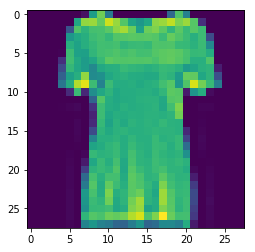

In [39]:
plt.imshow(x_train[10])
plt.show()

###  normalising training and test set

In [40]:
x_train=x_train/256
x_test=x_test/256

## Building model using tensorflow

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [42]:
model=Sequential()

In [43]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))        

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Model compilation
  - optimiser
  - loss
  - metrics

In [45]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

- training

In [46]:
history=model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.5050 - accuracy: 0.8206
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3763 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3478 - accuracy: 0.8772
Epoch 4/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3305 - accuracy: 0.8829
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3189 - accuracy: 0.8884
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3120 - accuracy: 0.8925
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2989 - accuracy: 0.8956
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2949 - accuracy: 0.8990
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2871 - accuracy: 0.9014
Epoch 10/10
60

### accuracy

In [47]:
test_losst,acc=model.evaluate(x_test,y_test,verbose=0)

In [48]:
print(acc)

0.8779


## predicting image

In [49]:
x=np.array([x_test[4]])

- actual image

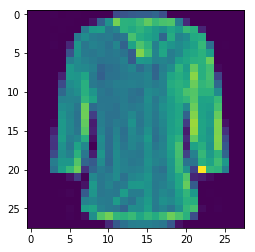

In [50]:
plt.imshow(x_test[4])
plt.show()

- prediction

In [51]:
pred=np.squeeze(model.predict_classes(x))
print(labels[int(pred)])

shirt


In [52]:
predictions=model.predict_classes(x_test)

### Plotting confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix

In [58]:
cf=confusion_matrix(y_test,predictions)

In [59]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x207b7f516d8>)

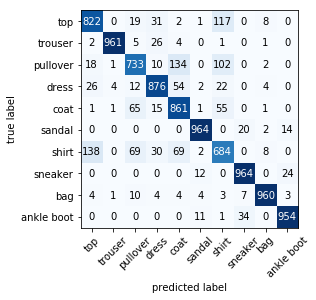

In [60]:
plot_confusion_matrix(cf,class_names=list(labels.values()))

### plotting learning curve

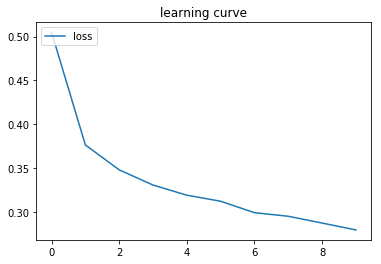

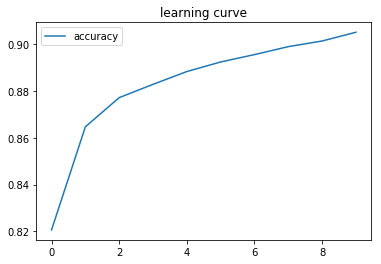

In [65]:
plt.plot(history.history['loss'],label='loss')
plt.title('learning curve')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['accuracy'],label='accuracy')
plt.title('learning curve')
plt.legend(loc="upper left")
plt.show()